<div style="
background: linear-gradient(90deg, #4b6cb7, #182848);
color:white;
font-family:Segoe UI, sans-serif;
font-size:22px;
font-weight:600;
text-align:center;
padding:14px;
border-radius:10px;
margin-bottom:10px;">
EuroMart Sales & Profitability Analysis
</div>

- Identify key factors influencing sales and profitability in different regions, product categories, and transaction types to optimize operations and pricing strategies.

- Identifying Top Performers: Pinpoint regions, product categories, and transaction types driving highest sales & profitability to replicate successful strategies.
- Understanding Challenges: Address operational inefficiencies and customer engagement issues in underperforming areas.
- Optimizing Discounts & Shipping Modes: Analyze impact of discounts and shipping modes to refine pricing strategies and logistics for max profitability.
- Leveraging Customer Feedback: Use customer feedback to enhance product offerings and improve overall business performance.
Improving Product Mix: Identify top-selling products and customer preferences to optimize our product mix.

**Note:-** 
- Remove null values and duplicates if Present.

### **Import Python Libraries**

The first step involved in ML using python is understanding and playing around with our data using libraries. Here is the link to the dataset.

Import all libraries which are required for our analysis, such as Data Loading, Statistical analysis, Visualizations, Data Transformations, Merge and Joins, etc.

Pandas and Numpy have been used for Data Manipulation and numerical Calculations

Matplotlib and Seaborn have been used for Data visualizations. 

In [50]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [51]:
Conn = mysql.connector.connect(
  host="localhost",               #hostname
  user="root",                   # the user who has privilege to the db
  passwd="Balaji@562123",               #password for user
  database ="euromart",               #database name
)

### **Reading Dataset**

The Pandas library offers a wide range of possibilities for loading data into the pandas DataFrame from files like JSON, .csv, .xlsx, .sql, .pickle, .html, .txt, images etc.

Most of the data are available in a tabular format of CSV files. It is trendy and easy to access. Using the read_csv() function, data can be converted to a pandas DataFrame.

In this article, the data to predict Used car price is being used as an example. In this dataset, we are trying to analyze the used car’s price and how EDA focuses on identifying the factors influencing the car price. We have stored the data in the DataFrame data.

In [52]:
query = "select * from euromart_stores;"

df1 = pd.read_sql(query,Conn)
df1.head()

,MyUnknownColumn,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.50,45,-26,3,False
1,1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.00,854,290,7,True
2,2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-RhÃ´ne-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.00,140,21,3,True
3,3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.50,27,-22,2,True
4,4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.50,17,-1,2,True


In [53]:
df1.shape

(8047, 18)

**info()** helps to understand the data type and information about data, including the number of records in each column, data having null or not null, Data type, the memory usage of the dataset

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MyUnknownColumn  8047 non-null   int64  
 1   Order ID         8047 non-null   object 
 2   Order Date       8047 non-null   object 
 3   Customer Name    8047 non-null   object 
 4   Country          8047 non-null   object 
 5   State            8047 non-null   object 
 6   City             8047 non-null   object 
 7   Region           8047 non-null   object 
 8   Segment          8047 non-null   object 
 9   Ship Mode        8047 non-null   object 
 10  Category         8047 non-null   object 
 11  Sub-Category     8047 non-null   object 
 12  Product Name     8047 non-null   object 
 13  Discount         8047 non-null   float64
 14  Sales            8047 non-null   int64  
 15  Profit           8047 non-null   int64  
 16  Quantity         8047 non-null   int64  
 17  Feedback?     

In [55]:
df1.columns

Index(['MyUnknownColumn', 'Order ID', 'Order Date', 'Customer Name', 'Country',
       'State', 'City', 'Region', 'Segment', 'Ship Mode', 'Category',
       'Sub-Category', 'Product Name', 'Discount', 'Sales', 'Profit',
       'Quantity', 'Feedback?'],
      dtype='object')

### **Finding The Inconsistency Error**

**data.info()** shows the variables Order ID', 'Order Date', 'Customer Name', 'Country', 'State', 'City','Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category','Product Name', 'Discount', 'Sales', 'Profit', 'Quantity', 'Feedback?'. Numeric variables like 'Order ID','Discount', 'Sales', 'Profit', 'Quantity', are of datatype as  float64 and int64. Categorical variables like 'Customer Name', 'Country', 'State', 'City', 'Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category', 'Product Name' are of object data type, and feedback are of boolean datatype.

**Check for Duplication**

nunique() based on several unique values in each column and the data description, we can identify the continuous and categorical columns in the data. Duplicated data can be handled or removed based on further analysis

In [56]:
df1.isnull().sum()

MyUnknownColumn    0
Order ID           0
Order Date         0
Customer Name      0
Country            0
State              0
City               0
Region             0
Segment            0
Ship Mode          0
Category           0
Sub-Category       0
Product Name       0
Discount           0
Sales              0
Profit             0
Quantity           0
Feedback?          0
dtype: int64

In [57]:
df1.duplicated(). sum() 

0

In [58]:
df1.drop_duplicates(inplace=True)

In [59]:
df1.duplicated(). sum()

0

In [60]:
df1.drop(columns=['MyUnknownColumn'] , inplace=True)

In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8047 entries, 0 to 8046
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       8047 non-null   object 
 1   Order Date     8047 non-null   object 
 2   Customer Name  8047 non-null   object 
 3   Country        8047 non-null   object 
 4   State          8047 non-null   object 
 5   City           8047 non-null   object 
 6   Region         8047 non-null   object 
 7   Segment        8047 non-null   object 
 8   Ship Mode      8047 non-null   object 
 9   Category       8047 non-null   object 
 10  Sub-Category   8047 non-null   object 
 11  Product Name   8047 non-null   object 
 12  Discount       8047 non-null   float64
 13  Sales          8047 non-null   int64  
 14  Profit         8047 non-null   int64  
 15  Quantity       8047 non-null   int64  
 16  Feedback?      8047 non-null   object 
dtypes: float64(1), int64(3), object(13)
memory usage: 1.

In [62]:
df1.shape

(8047, 17)

In [ ]:

df=df1.copy()

### **Features Engineering**

We will play around with the variables Order Date in our dataset. If we see the sample data, the column “Order Date” shows the sale date.

It would be difficult to find the Year & Month wise Sales and Profit.

Introducing a new column, 'Year' , 'Month' to know the sales and Profit distribution on various datetime. 

Convert Discount decimal to integer.

Finding the Total_sales, Total_profit.

Making the Numarical month into Categorical Months.

In [64]:
df['Year'] = pd.DatetimeIndex(df['Order Date']).year
df['Month'] = pd.DatetimeIndex(df['Order Date']).month

In [65]:
df['Discount'] = df['Discount']*100
df['Discount'] = df['Discount'].astype('int')

In [66]:
df['Total_Sales'] = df['Sales'] * df['Quantity']
df['Total_Profit'] = df['Profit'] * df['Quantity']

In [67]:
df['Discount_Amount'] = df['Total_Sales'] * (df['Discount'] / 100)

In [68]:
df['Net_Sales'] = df['Total_Sales'] - df['Discount_Amount']
df['Net_Profit'] = df['Total_Profit'] - df['Discount_Amount']

In [69]:
df['Discount_Amount'] = df['Total_Sales'] * (df['Discount'] / 100)

In [70]:
df['Discount_Amount'] = df['Total_Sales'] * (df['Discount'] / 100)

In [71]:
df.rename(columns={'Discount': 'Discount(%)', 'Feedback?':'Feedback'}, inplace=True)

In [72]:
df['Year'].unique()

array([2011, 2012, 2013, 2014], dtype=int64)

In [73]:
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [74]:
def qurter(month):
    if month in [1,2,3]:
        return "Quarter 1"
    elif month in [4,5,6]:
        return "Quarter 2"
    elif month in [7,8,9]:
        return "Quarter 3"
    else:
        return "Quarter 4"

df['Quarters'] = df['Month'].apply(qurter)

In [75]:
df['Quarters'].unique()

array(['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4'], dtype=object)

In [76]:
df.head()

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,...,Quantity,Feedback,Year,Month,Total_Sales,Total_Profit,Discount_Amount,Net_Sales,Net_Profit,Quarters
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,...,3,False,2011,1,135,-78,67.50,67.50,-145.50,Quarter 1
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,...,7,True,2011,1,5978,2030,0.00,"5,978.00","2,030.00",Quarter 1
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-RhÃ´ne-Alpes,Valence,Central,Consumer,Economy,Office Supplies,...,3,True,2011,1,420,63,0.00,420.00,63.00,Quarter 1
3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,...,2,True,2011,1,54,-44,27.00,27.00,-71.00,Quarter 1
4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,...,2,True,2011,1,34,-2,17.00,17.00,-19.00,Quarter 1


In [77]:
df['Month'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Api', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)

In [78]:
df.columns

Index(['Order ID', 'Order Date', 'Customer Name', 'Country', 'State', 'City',
       'Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category',
       'Product Name', 'Discount(%)', 'Sales', 'Profit', 'Quantity',
       'Feedback', 'Year', 'Month', 'Total_Sales', 'Total_Profit',
       'Discount_Amount', 'Net_Sales', 'Net_Profit', 'Quarters'],
      dtype='object')

We have done the fundamental data analysis, Featuring, and data clean-up. Let’s move to the EDA process 

Voila!! Our Data is ready to perform EDA.

### **EDA Exploratory Data Analysis**

Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.

- EDA can be leveraged to check for outliers, patterns, and trends in the given data.
- EDA helps to find meaningful patterns in data.
- EDA provides in-depth insights into the data sets to solve our business problems.
- EDA gives a clue to impute missing values in the dataset

### **Statistics Summary**

The information gives a quick and simple description of the data.

Can include Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation, etc.

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In python, this can be achieved using describe()

describe() function gives all statistics summary of data

describe()– Provide a statistics summary of data belonging to numerical datatype such as int, float

In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Discount(%),"8,047.00",11.00,18.18,0.00,0.00,0.00,10.00,85.00
Sales,"8,047.00",291.85,485.21,3.00,48.00,117.00,313.00,"6,517.00"
Profit,"8,047.00",35.20,178.13,"-3,060.00",1.00,14.00,47.00,"2,476.00"
Quantity,"8,047.00",3.77,2.20,1.00,2.00,3.00,5.00,14.00
Year,"8,047.00","2,012.73",1.10,"2,011.00","2,012.00","2,013.00","2,014.00","2,014.00"
Total_Sales,"8,047.00","1,478.69","3,725.81",3.00,127.50,413.00,"1,273.00","80,206.00"
Total_Profit,"8,047.00",171.49,"1,325.43","-36,720.00",1.00,40.00,181.00,"29,712.00"
Discount_Amount,"8,047.00",152.92,663.14,0.00,0.00,0.00,57.00,"20,400.00"
Net_Sales,"8,047.00","1,325.77","3,422.64",1.50,112.00,352.80,"1,161.00","78,204.00"
Net_Profit,"8,047.00",18.58,"1,717.90","-57,120.00",-15.00,30.00,147.00,"29,712.00"


In [80]:
df.describe(include='object').T

,count,unique,top,freq
Order ID,8047,4117,AZ-2014-7040665,11
Order Date,8047,1214,2014-11-12,32
Customer Name,8047,792,Joel Peters,32
Country,8047,15,France,1916
State,8047,127,England,1187
City,8047,999,London,219
Region,8047,3,Central,4426
Segment,8047,3,Consumer,4174
Ship Mode,8047,4,Economy,4862
Category,8047,3,Office Supplies,5286


Order Date Distribution: The orders in the dataset span from January 1, 2011, to December 31, 2014, with the majority falling between June 2012 and April 2014.

Discount Analysis: The average discount applied to orders is approximately 11%, with a minimum of 0% and a maximum of 85%. 

Sales Performance: The average sales amount per order is ₹291.90. Sales vary widely, with the lowest recorded sale being ₹3.00 and the highest reaching ₹6517.00.

Profit Analysis: The average profit per order is ₹35.20. However, there are instances of losses, with the lowest recorded profit being -₹3060.00. This indicates potential areas for improvement in cost management or pricing strategies.

Temporal Analysis:
- Yearly Trend: The dataset covers predominantly the years 2012 to 2014, with most orders occurring in 2013.
- Monthly Trend: Orders are distributed relatively evenly across the months, with a slight peak observed in October. May indicate seasonality or specific promotional periods.Order Date Distribution: The orders in the dataset span from January 1, 2011, to December 31, 2014, with the majority falling between June 2012 and April 2014.

Discount Analysis: The average discount applied to orders is approximately 11%, with a minimum of 0% and a maximum of 85%. 

Sales Performance: The average sales amount per order is ₹291.90. Sales vary widely, with the lowest recorded sale being ₹3.00 and the highest reaching ₹6517.00.

Profit Analysis: The average profit per order is ₹35.20. However, there are instances of losses, with the lowest recorded profit being -₹3060.00. This indicates potential areas for improvement in cost management or pricing strategies.

Temporal Analysis:
- Yearly Trend: The dataset covers predominantly the years 2012 to 2014, with most orders occurring in 2013.
- Monthly Trend: Orders are distributed relatively evenly across the months, with a slight peak observed in October. May indicate seasonality or specific promotional periods.

In [81]:
cat = df.select_dtypes(exclude=['int', 'float']).columns
num  = df.select_dtypes(include=['int', 'float']).columns.tolist()
print(cat)
print(num)

Index(['Order ID', 'Order Date', 'Customer Name', 'Country', 'State', 'City',
       'Region', 'Segment', 'Ship Mode', 'Category', 'Sub-Category',
       'Product Name', 'Feedback', 'Month', 'Quarters'],
      dtype='object')
['Discount(%)', 'Sales', 'Profit', 'Quantity', 'Year', 'Total_Sales', 'Total_Profit', 'Discount_Amount', 'Net_Sales', 'Net_Profit']


### **Univariate Analysis**
Analyzing/visualizing the dataset by taking one variable at a time:

Data visualization is essential; we must decide what charts to plot to better understand the data. In this article, we visualize our data using Matplotlib and Seaborn libraries.

Matplotlib is a Python 2D plotting library used to draw basic charts we use Matplotlib.

Seaborn is also a python library built on top of Matplotlib that uses short lines of code to create and style statistical plots from Pandas and Numpy

Univariate analysis can be done for both Categorical and Numerical variables.

Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

In our example, we have done a Univariate analysis using Histogram for continuous Variables.

In the below fig, a histogram is used to show the pattern of the variables.

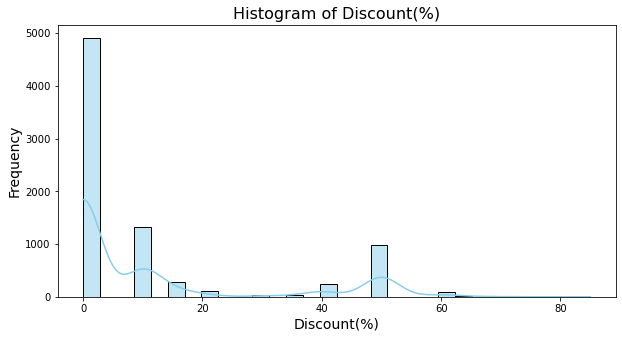

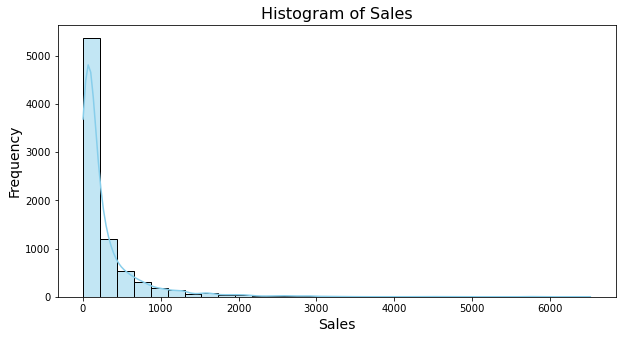

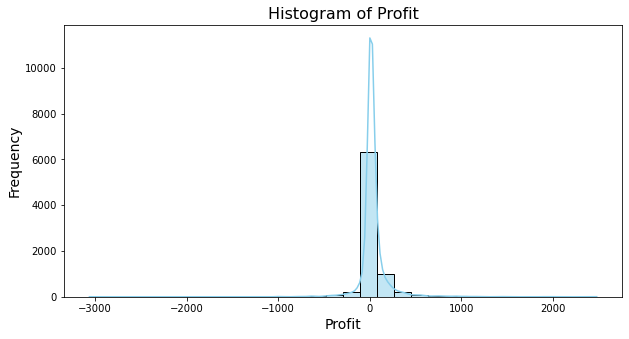

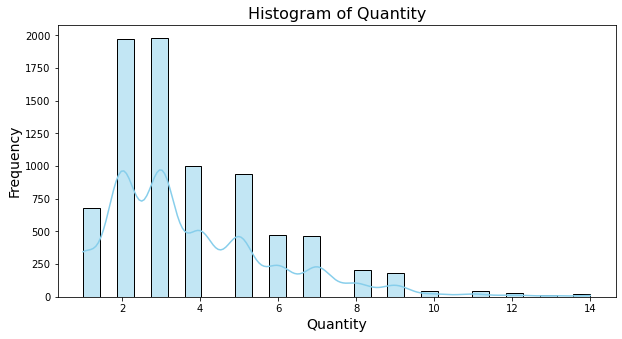

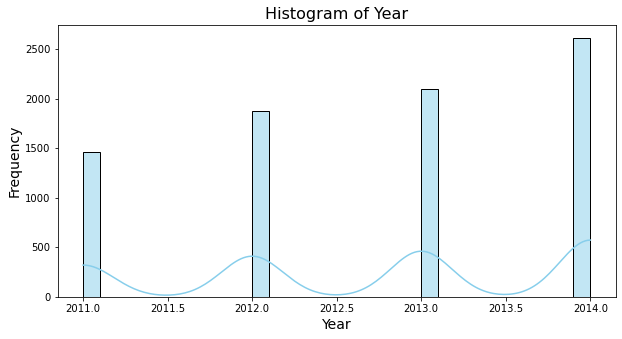

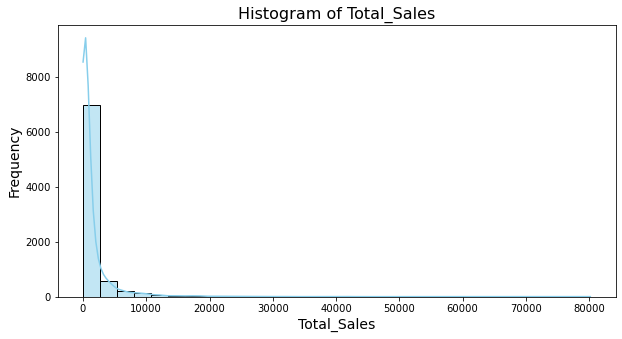

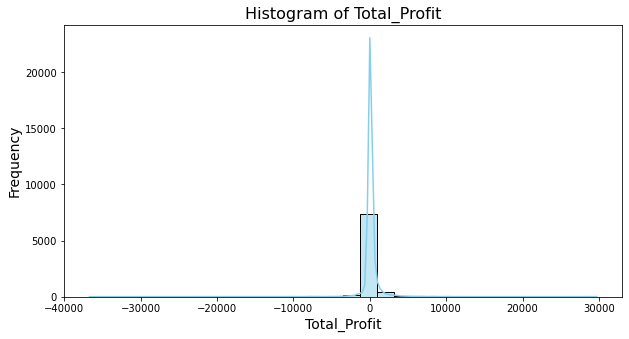

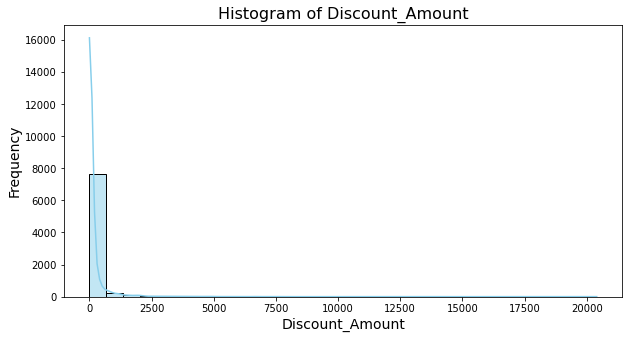

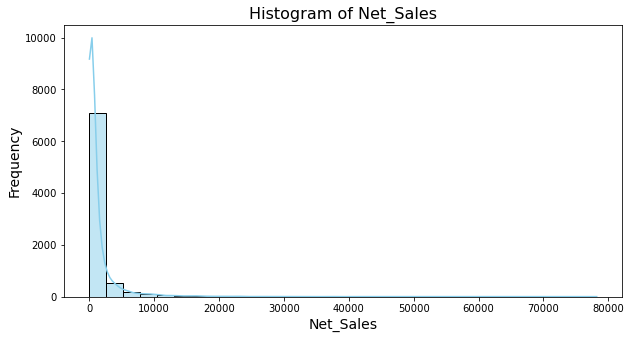

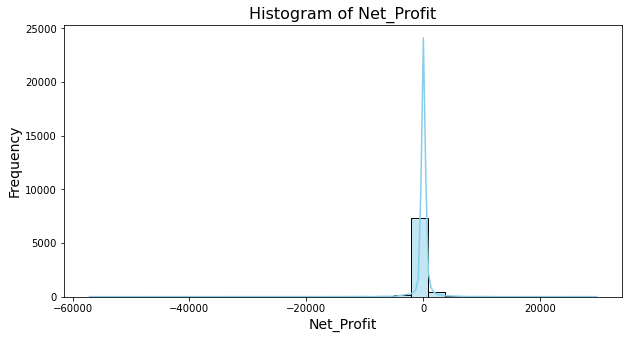

In [82]:
# Univariate Analysis for numerical variables
for i in num:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df, x=i, kde=True, color='skyblue', bins=30)
    plt.title(f'Histogram of {i}', fontsize=16)
    plt.xlabel(i, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.show()

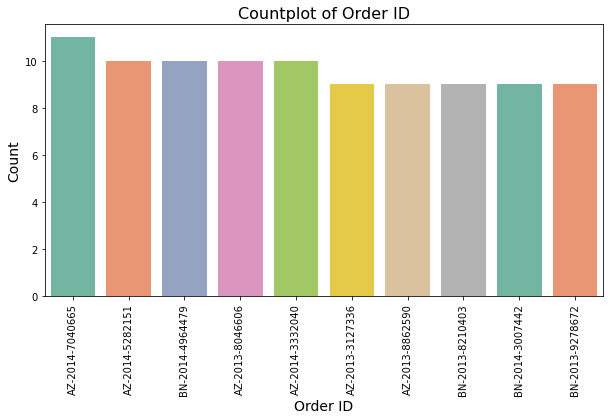

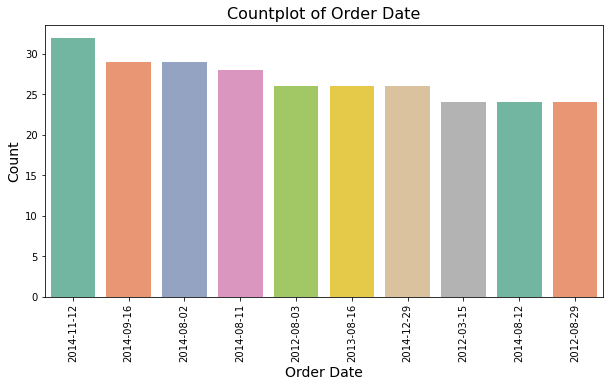

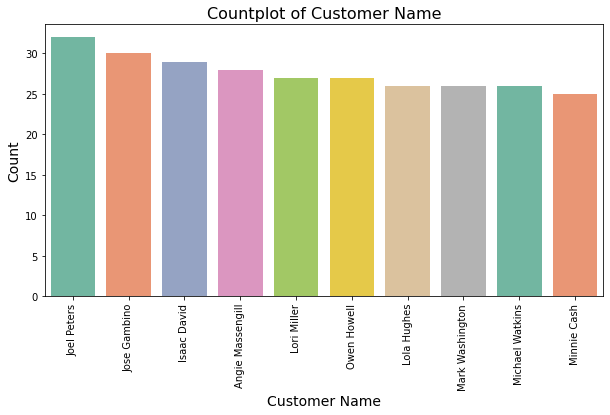

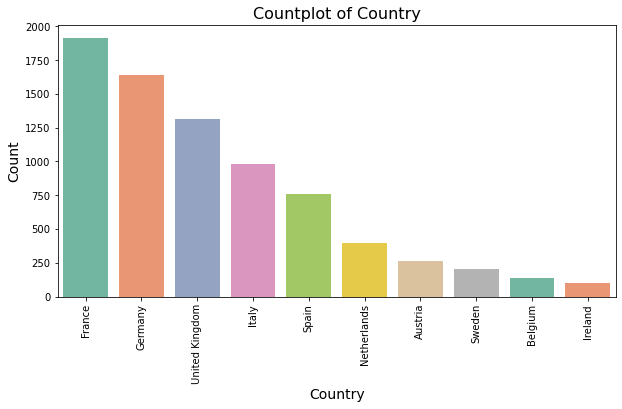

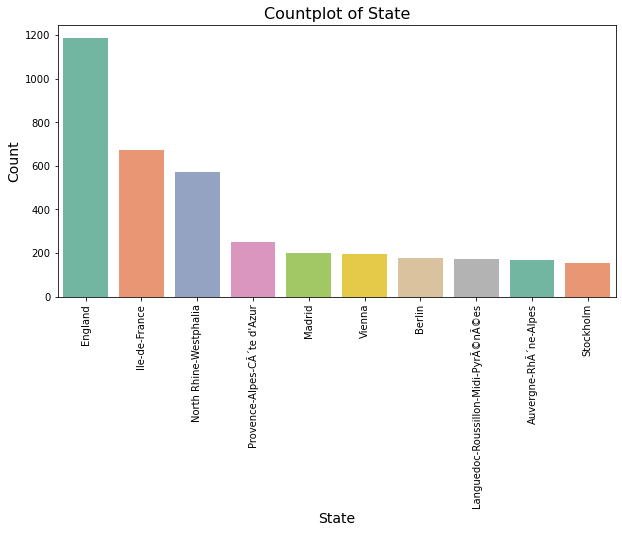

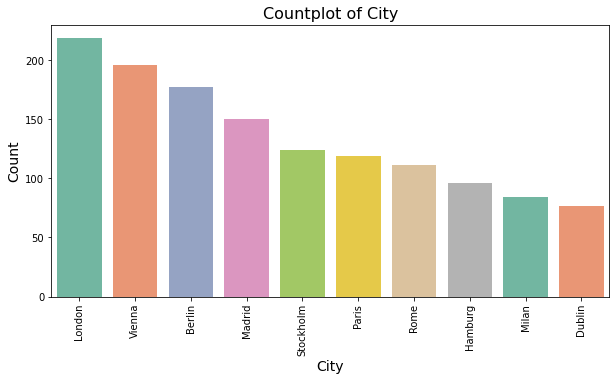

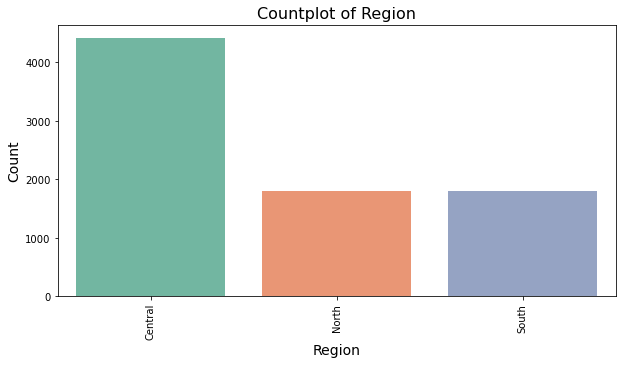

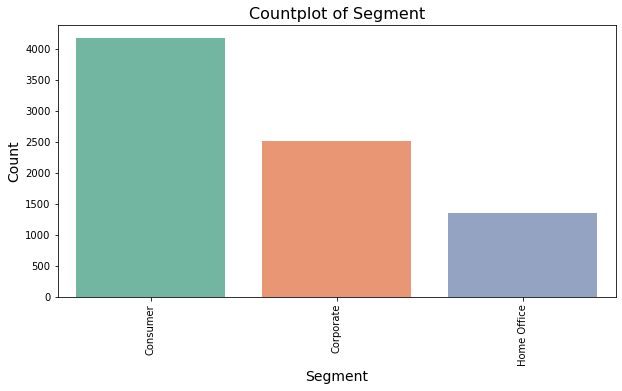

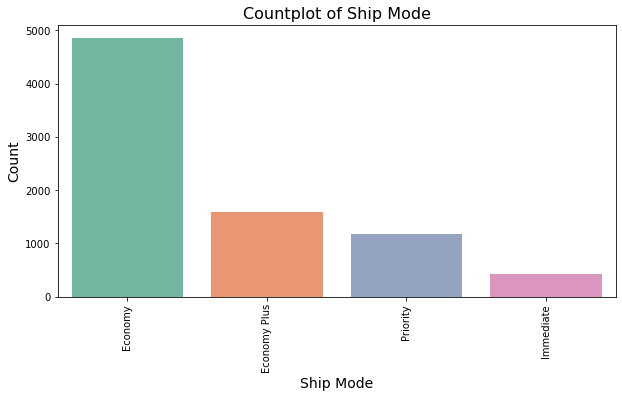

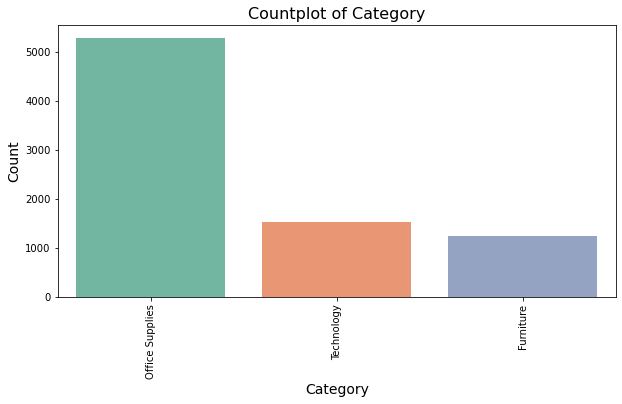

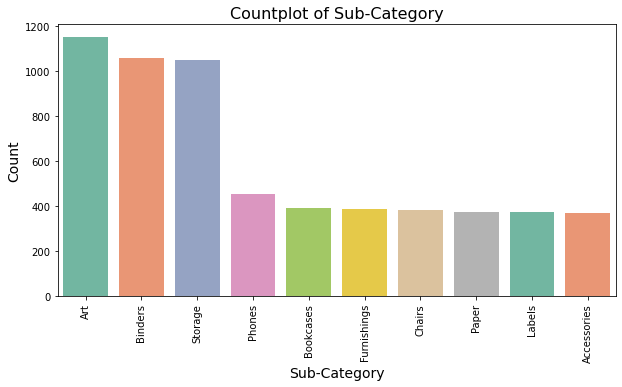

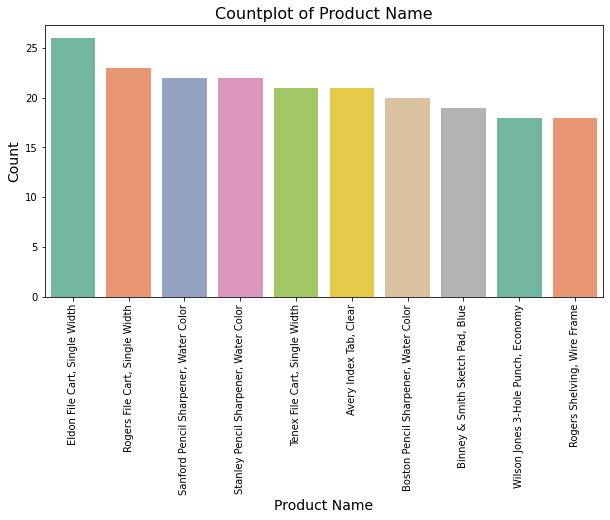

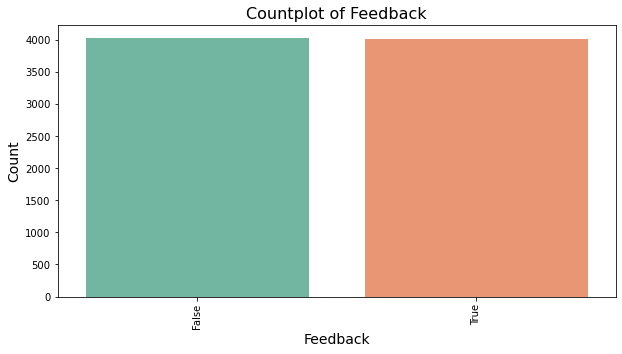

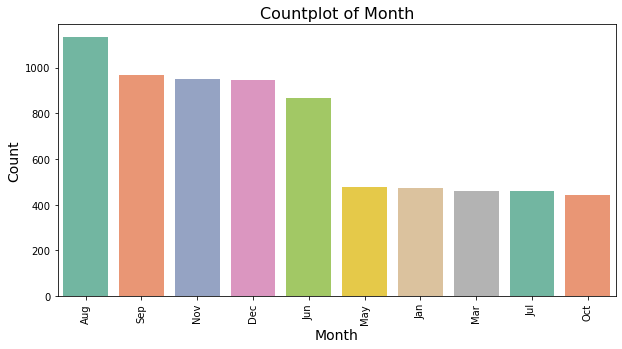

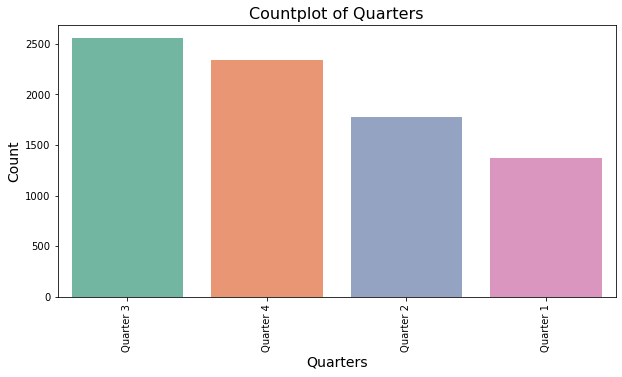

In [83]:
# Univariate Analysisn for categorical variables as histogram
for i in cat:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=i, palette='Set2',order=df[i].value_counts().head(10).index)
    plt.title(f'Countplot of {i}', fontsize=16)
    plt.xlabel(i, fontsize=14,)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=90)
    plt.show()


- France has the highest sales, followed by Germany and the United Kingdom.
- England leads in sales in the state category, followed by Ile-de-France and North Rhine-Westphalia.
- London and Vienna top the sales charts in the city category, followed by Berlin and Madrid.
- The consumer segment experiences the highest purchasing activity.
- Economy shipment mode prevails in sales, followed by economy plus.
- Office supplies are the most purchased items, followed by technology.
- Art, binders, and storage items are the best-selling products.
- Aug month has the highest sale, followed by Sep and Nov.

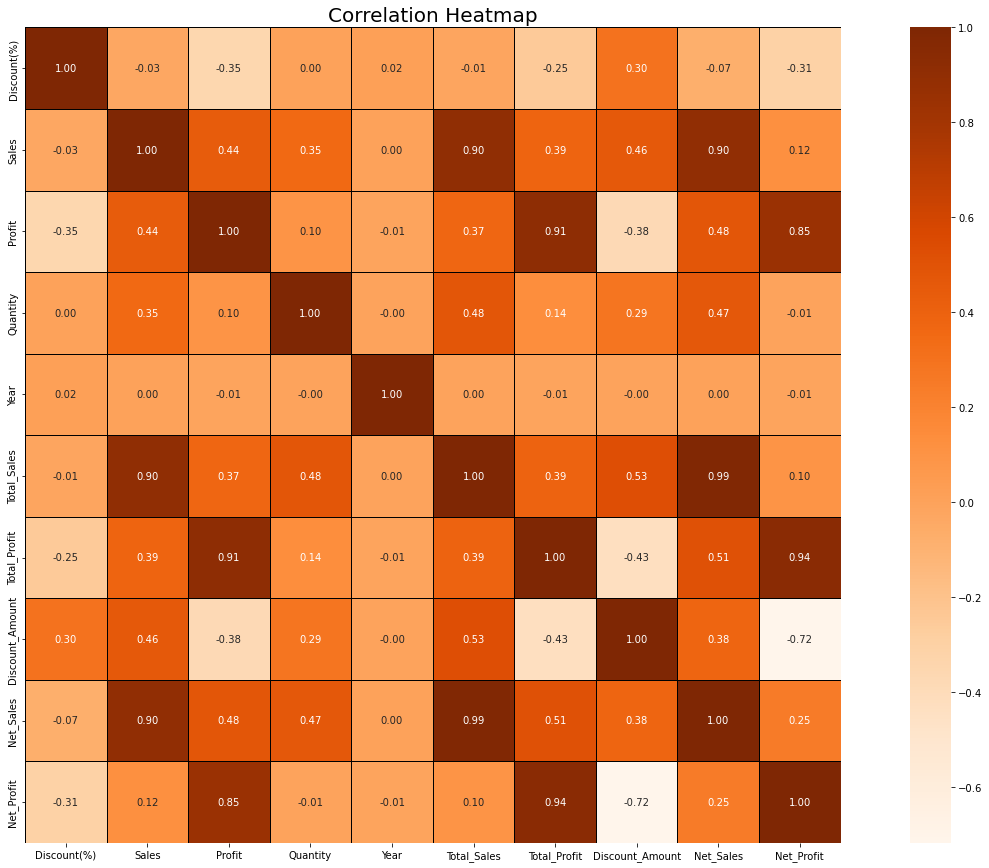

In [84]:
#correlation heatmap
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), annot=True, cmap='Oranges',linewidths=0.5,linecolor='black',square=True, fmt='.2f')
plt.title('Correlation Heatmap', fontsize=20)
plt.show()


Heatmap provides below insights:
- Sales has a positive correlation with Profit and Quantity
- A Discount has a Negative Correlation with Profit
- Profit has a Positive Correlation with Sales

**Finding insights**

In [85]:
# Set the display format for floating point numbers
pd.options.display.float_format = '{:,.2f}'.format

In [86]:
df1

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,BN-2011-7407039,2011-01-01,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",0.50,45,-26,3,False
1,AZ-2011-9050313,2011-01-03,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",0.00,854,290,7,True
2,AZ-2011-6674300,2011-01-04,Devin Huddleston,France,Auvergne-RhÃ´ne-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",0.00,140,21,3,True
3,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",0.50,27,-22,2,True
4,BN-2011-2819714,2011-01-04,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",0.50,17,-1,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8042,AZ-2014-766953,2014-12-31,Jose Gambino,United Kingdom,England,Maidenhead,North,Corporate,Economy,Furniture,Bookcases,"Ikea Stackable Bookrack, Traditional",0.00,245,91,2,True
8043,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Art,"BIC Pencil Sharpener, Fluorescent",0.50,30,-10,2,False
8044,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Office Supplies,Binders,"Avery Binder Covers, Recycled",0.50,23,-6,4,True
8045,BN-2014-4140795,2014-12-31,Daniel Hamilton,Netherlands,North Brabant,Eindhoven,Central,Home Office,Economy Plus,Technology,Machines,"StarTech Phone, Red",0.50,108,-19,3,False


In [87]:
print(f'Total Revenue {df["Sales"].sum()}')

Total Revenue 2348482


In [88]:
print("Rows and columns:", df.shape)
print("Nulls in Sales:", df['Sales'].isna().sum())
print("Sales dtype:", df['Sales'].dtype)
print("Duplicate rows:", df.duplicated().sum())
print("Sales sum:", df['Sales'].sum())

Rows and columns: (8047, 25)
Nulls in Sales: 0
Sales dtype: int64
Duplicate rows: 2
Sales sum: 2348482


In [89]:
df.drop_duplicates(inplace=True)

In [90]:
print(f'Total Revenue {df["Sales"].sum()}')

Total Revenue 2348361


In [91]:
print(f"Total_units_sold {df['Quantity'].sum()}")

Total_units_sold 30348


In [92]:
print(f"Total Discount {df['Discount_Amount'].sum()}")

Total Discount 1230519.4


In [93]:
print(f'Profit Margin {round(df["Net_Profit"].sum()/df["Net_Sales"].sum() * 100)} %')

Profit Margin 1 %


In [94]:
# Group data by month and calculate sum
year_analysis = df.groupby('Year').agg({
    'Total_Sales': 'sum',
    'Total_Profit': 'sum',
    'Quantity': 'sum',
}).reset_index().sort_values(by='Total_Sales', ascending=False)

In [95]:
year_analysis.style.background_gradient(cmap='Oranges')

,Year,Total_Sales,Total_Profit,Quantity
3,2014,3788882,411056,9833
2,2013,3227941,365588,7935
1,2012,2765225,304979,7096
0,2011,2116572,298257,5484


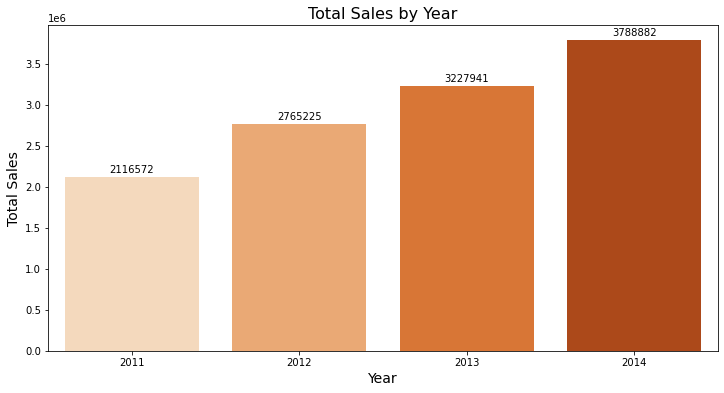

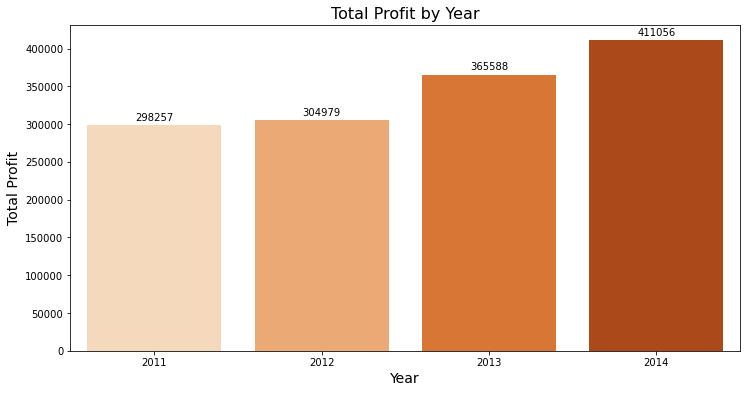

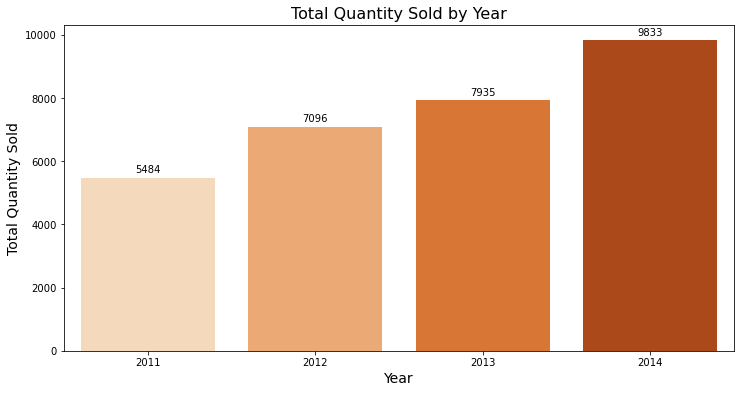

In [111]:
#plotting
plt.figure(figsize=(12,6))

#sales bar plot
sns.barplot(data=year_analysis, x='Year', y='Total_Sales', palette='Oranges')
plt.bar_label(plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Total Sales by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.show()

#profit bar plot
plt.figure(figsize=(12,6))
sns.barplot(data=year_analysis, x='Year', y='Total_Profit', palette='Oranges')
plt.bar_label(bar_values := plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Total Profit by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.show()

#quantity bar plot
plt.figure(figsize=(12,6))
sns.barplot(data=year_analysis, x='Year', y='Quantity', palette='Oranges')
plt.bar_label(plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Total Quantity Sold by Year', fontsize=16)   
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.show()


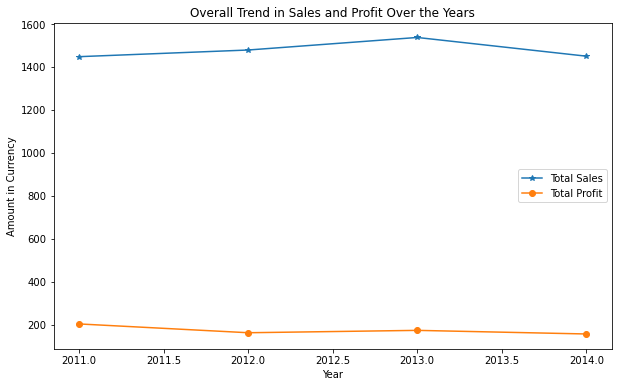

In [172]:
# Group data by 'Year' and calculate total sales and profit for each year
yearly_data = df.groupby('Year').agg({'Total_Sales': 'mean', 'Total_Profit': 'mean'}).reset_index()

# Plotting the trends
plt.figure(figsize=(10, 6))
plt.plot(yearly_data['Year'], yearly_data['Total_Sales'], label='Total Sales', marker='*')
plt.plot(yearly_data['Year'], yearly_data['Total_Profit'], label='Total Profit', marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Amount in Currency')
plt.title('Overall Trend in Sales and Profit Over the Years')
plt.legend()

# Show the plot
plt.show()

- Sales Trend: There is a general increasing trend in sales over the years, with 2014 showing the highest sales figures.
- Profitability: Profit also shows an increasing trend over the years, reflecting positive growth and performance.
- Steady Growth: The data suggests a steady growth trajectory in both sales and profit over the four-year period, indicating overall positive performance and market expansion.

Which Ship Mode contribute the most to sales and profit?

In [112]:
#group data by month and calculate sum
shipping_analysis = df.groupby('Ship Mode').agg({
    'Total_Sales': 'sum',
    'Total_Profit': 'sum',
    'Quantity': 'sum',
}).reset_index().sort_values(by='Total_Sales', ascending=False)

In [113]:
shipping_analysis.style.background_gradient(cmap='Oranges')

,Ship Mode,Total_Sales,Total_Profit,Quantity
0,Economy,7077403,841868,18384
1,Economy Plus,2552289,296482,6000
3,Priority,1599961,172852,4405
2,Immediate,668967,68678,1559


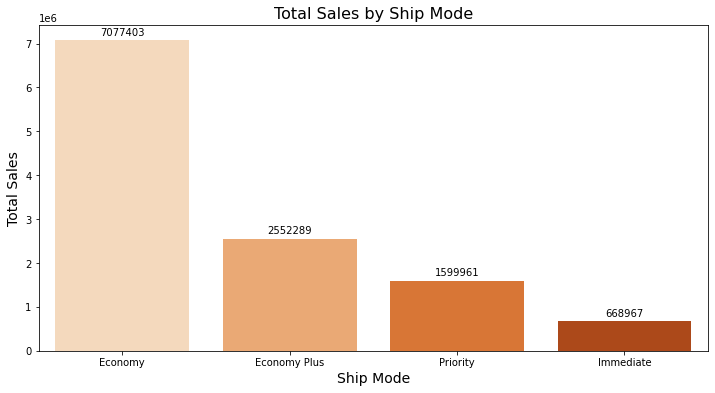

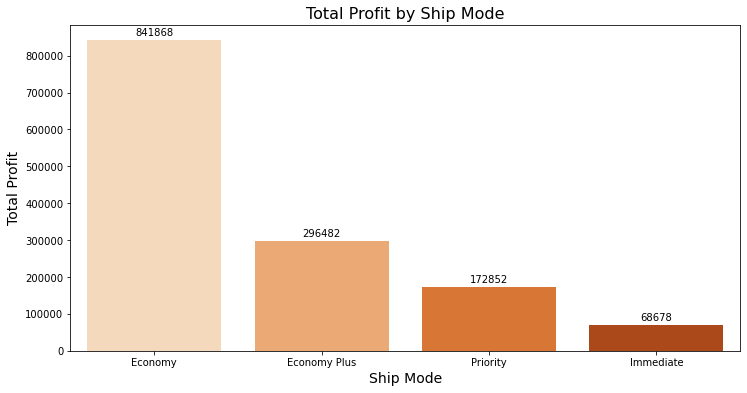

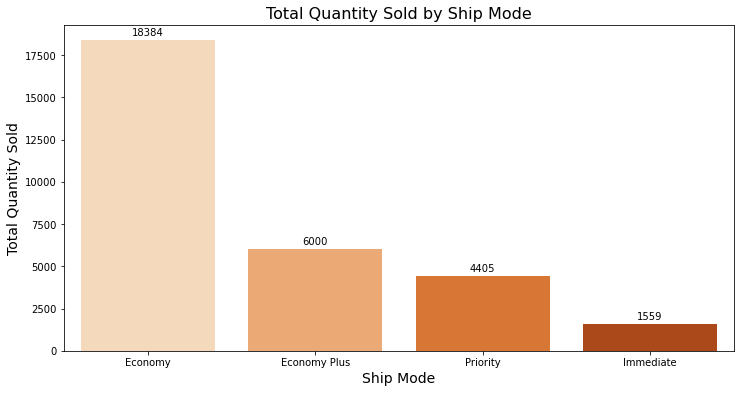

In [116]:

#sales plot by ship mode
plt.figure(figsize=(12,6))
sns.barplot(data=shipping_analysis, x='Ship Mode', y='Total_Sales', palette='Oranges')
plt.bar_label(plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Total Sales by Ship Mode', fontsize=16)
plt.xlabel('Ship Mode', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.show()

#profit plot by ship mode
plt.figure(figsize=(12,6))
sns.barplot(data=shipping_analysis, x='Ship Mode', y='Total_Profit', palette='Oranges')
plt.bar_label(bar_values := plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Total Profit by Ship Mode', fontsize=16)
plt.xlabel('Ship Mode', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.show()

#quantity plot by ship mode
plt.figure(figsize=(12,6))
sns.barplot(data=shipping_analysis, x='Ship Mode', y='Quantity', palette='Oranges')
plt.bar_label(plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Total Quantity Sold by Ship Mode', fontsize=16)
plt.xlabel('Ship Mode', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.show()


- Economy Ship Mode Dominance: Economy ship mode stands out with the highest sales and profit among all ship modes, indicating its popularity and profitability.
- Economy Plus: While economy plus follows in terms of sales, it still maintains a respectable profit margin, suggesting its significance in the overall revenue generation.
- Priority and Immediate: These ship modes contribute to sales and profit, although they have comparatively lower figures compared to economy and economy plus.

Which Segment contribute the most to sales and profit?

In [120]:
#group data by month and calculate sum
segment_analysis = df.groupby('Segment').agg({
    'Total_Sales': 'sum',
    'Total_Profit': 'sum',
    'Quantity': 'sum',
}).reset_index().sort_values(by='Total_Sales', ascending=False)

In [121]:
segment_analysis.style.background_gradient(cmap='Oranges')

,Segment,Total_Sales,Total_Profit,Quantity
0,Consumer,6165539,714389,15713
1,Corporate,3880087,491889,9498
2,Home Office,1852994,173602,5137


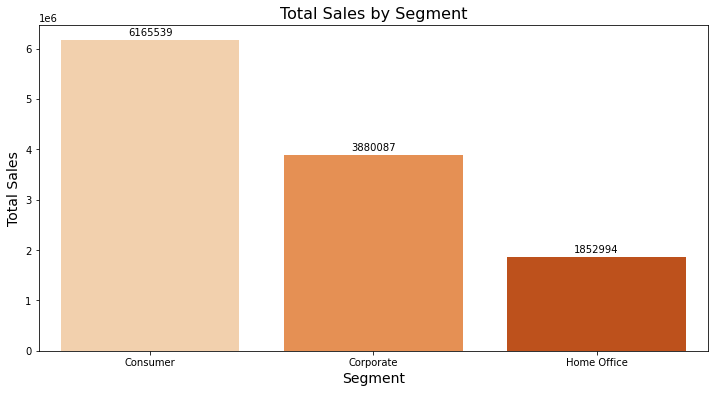

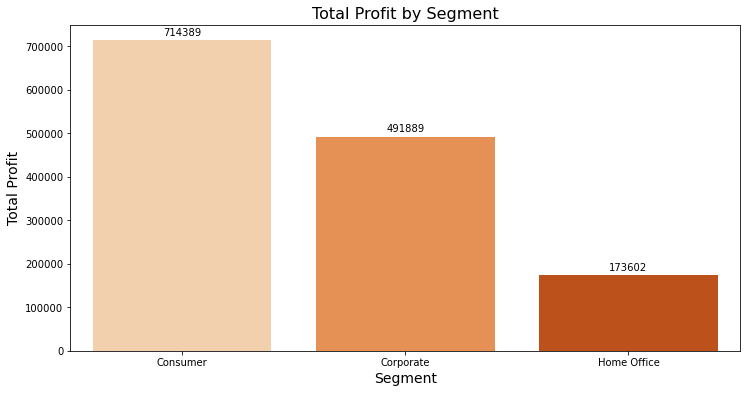

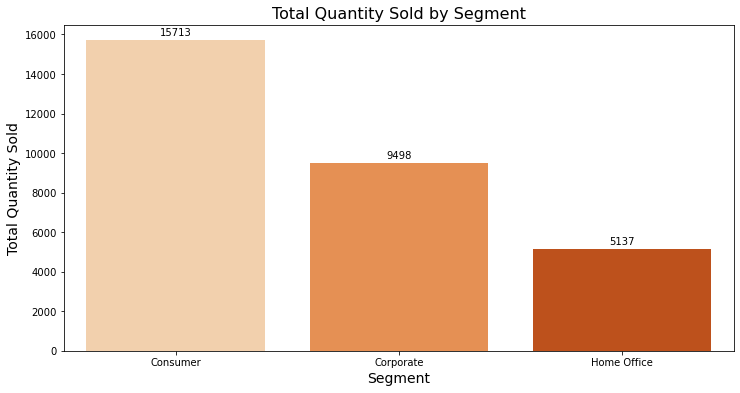

In [124]:
#sales plot by segment
plt.figure(figsize=(12,6))
sns.barplot(data=segment_analysis, x='Segment', y='Total_Sales', palette='Oranges')
plt.bar_label(plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Total Sales by Segment', fontsize=16)
plt.xlabel('Segment', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.show()

#profit plot by segment
plt.figure(figsize=(12,6))
sns.barplot(data=segment_analysis, x='Segment', y='Total_Profit', palette='Oranges')
plt.bar_label(bar_values := plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Total Profit by Segment', fontsize=16)
plt.xlabel('Segment', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.show()

#quantity plot by segment
plt.figure(figsize=(12,6))
sns.barplot(data=segment_analysis, x='Segment', y='Quantity', palette='Oranges')
plt.bar_label(plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Total Quantity Sold by Segment', fontsize=16)
plt.xlabel('Segment', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.show()


- Consumer Segment Dominance: The consumer segment stands out with the highest sales and profit among all segments, indicating strong demand and profitability.
- Corporate Segment: While the corporate segment follows in terms of sales, it shows a notable profit margin, suggesting efficient operations or pricing strategies.
- Home Office Segment: Although the home office segment has the lowest sales, it still maintains a decent profit margin, contributing to overall profitability.

Which City has the highest sales, and which has the highest profit?

In [125]:
#group data by month and calculate sum
city_analysis = df.groupby('City').agg({
    'Total_Sales': 'sum',
    'Total_Profit': 'sum',
    'Quantity': 'sum',
}).reset_index().sort_values(by='Total_Sales', ascending=False)


In [128]:
city_analysis.head(10).style.background_gradient(cmap='Oranges')

,City,Total_Sales,Total_Profit,Quantity
531,London,356234,74692,820
102,Berlin,294968,35267,690
933,Vienna,248757,61657,714
552,Madrid,231149,57695,577
686,Paris,216852,35516,496
517,Lille,138947,3637,105
757,Rome,136827,2006,409
576,Marseille,136057,18813,283
75,Barcelona,122154,5735,231
402,Hamburg,117888,29302,385


In [130]:
city_analysis.tail(10).style.background_gradient(cmap='Oranges')

,City,Total_Sales,Total_Profit,Quantity
392,GÃ¼nzburg,44,11,1
594,Millau,42,10,2
859,SÃ¨te,42,21,3
176,Castellammare di Stabia,30,-35,1
838,Sorgues,28,6,2
314,Falconara Marittima,26,7,1
438,Illkirch-Graffenstaden,24,8,1
86,Battipaglia,22,-20,1
12,Aix-les-Bains,10,4,1
670,Osny,5,2,1


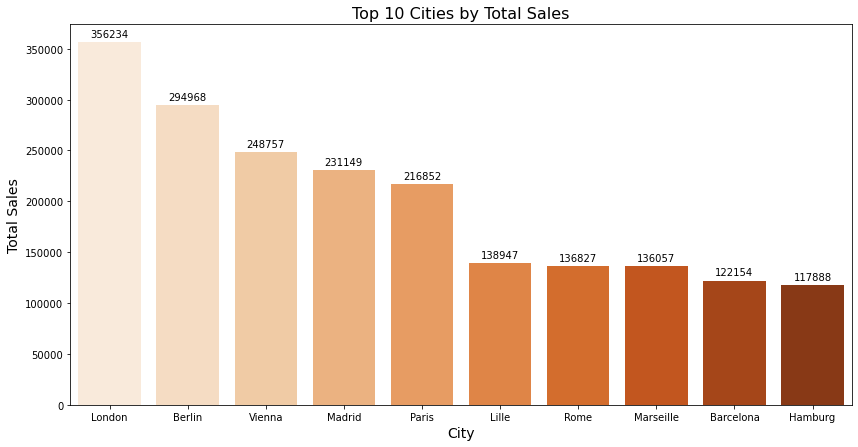

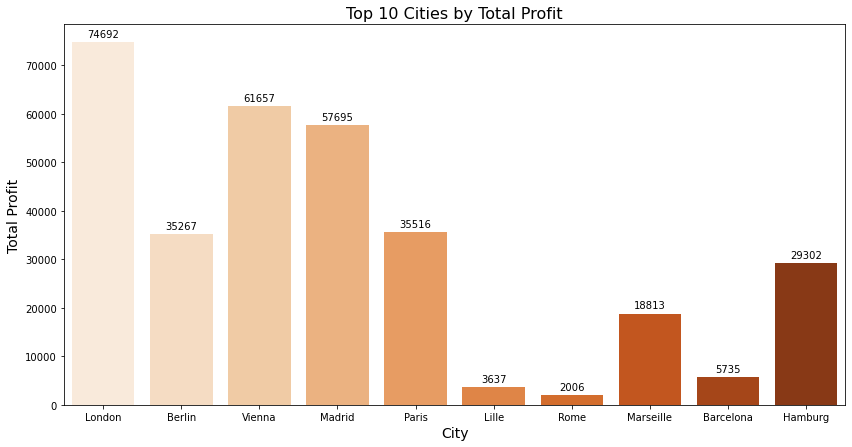

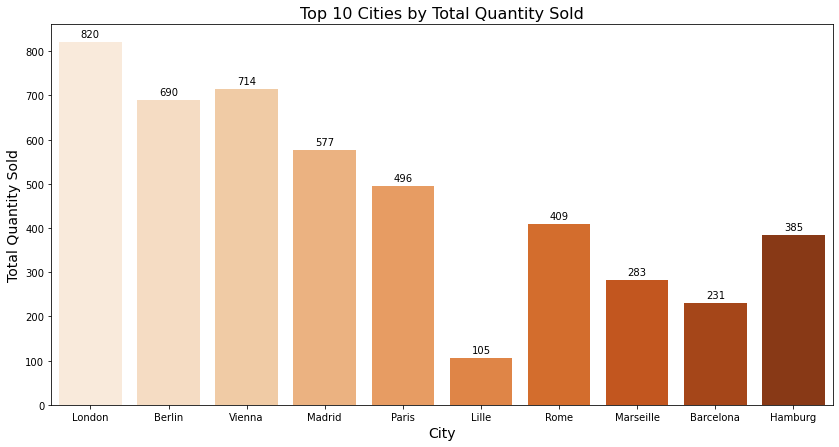

In [129]:
#sales plot by city
plt.figure(figsize=(14,7))
sns.barplot(data=city_analysis.head(10), x='City', y='Total_Sales', palette='Oranges')
plt.bar_label(plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Top 10 Cities by Total Sales', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.show()

#profit plot by city
plt.figure(figsize=(14,7))
sns.barplot(data=city_analysis.head(10), x='City', y='Total_Profit', palette='Oranges')
plt.bar_label(bar_values := plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Top 10 Cities by Total Profit', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.show()

#quantity plot by city
plt.figure(figsize=(14,7))
sns.barplot(data=city_analysis.head(10), x='City', y='Quantity', palette='Oranges')
plt.bar_label(plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Top 10 Cities by Total Quantity Sold', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.show()

- London Leading: London emerges as the top performer in both sales and profit, showcasing strong market activity.
- Vienna's Profitability: Vienna demonstrates a high profit margin despite slightly lower sales compared to London, indicating efficient operations or pricing strategies.
- Challenges in Rome: While Rome shows moderate sales, the profit margin is notably low, suggesting potential issues with cost management or pricing strategies in this city.

Which State has the highest sales, and which has the highest profit?

In [138]:
#group data by month and calculate sum
state_analysis = df.groupby('State').agg({
    'Total_Sales': 'sum',
    'Total_Profit': 'sum',
    'Quantity': 'sum',
}).reset_index().sort_values(by='Total_Sales', ascending=False)


In [133]:
state_analysis.head(10).style.background_gradient(cmap='Oranges')

,State,Total_Sales,Total_Profit
41,England,1963707,421353
59,Ile-de-France,1176753,152239
81,North Rhine-Westphalia,815059,150792
87,Provence-Alpes-CÃ´te d'Azur,418526,67424
77,Nord-Pas-de-Calais-Picardie,307676,23906
15,Berlin,294968,35267
70,Madrid,285652,65899
14,Bavaria,258407,51249
61,Languedoc-Roussillon-Midi-PyrÃ©nÃ©es,255625,-22880
7,Auvergne-RhÃ´ne-Alpes,249742,41601


In [134]:
state_analysis.tail(10).style.background_gradient(cmap='Oranges')

,State,Total_Sales,Total_Profit
45,Friesland,1416,-974
48,Galway,1195,-810
105,SÃ¶dermanland,1132,-544
97,SetÃºbal,546,-33
60,Kymenlaakso,474,14
42,Extremadura,458,-40
73,Melilla,382,84
12,Basilicata,344,-328
102,St. Gallen,212,63
31,Central Jutland,51,-39


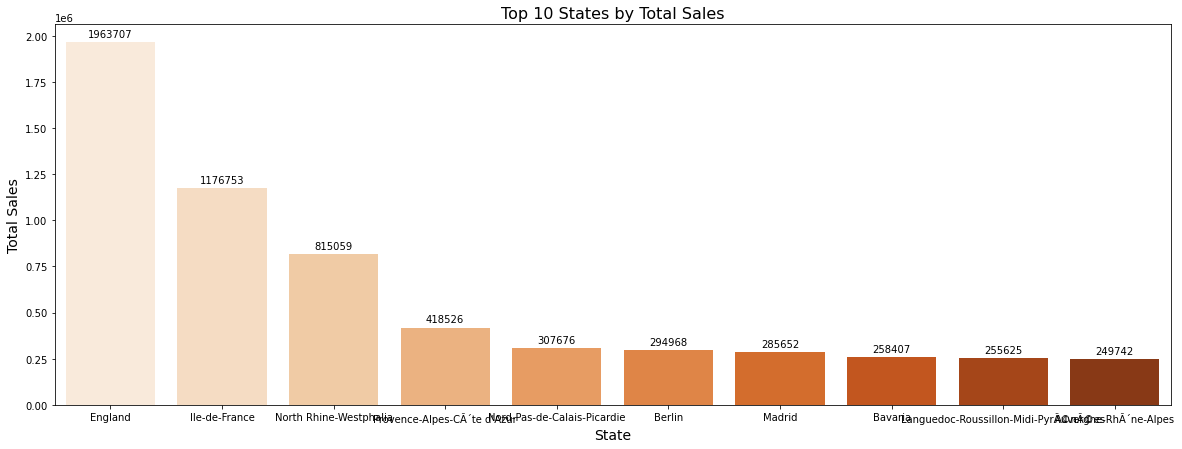

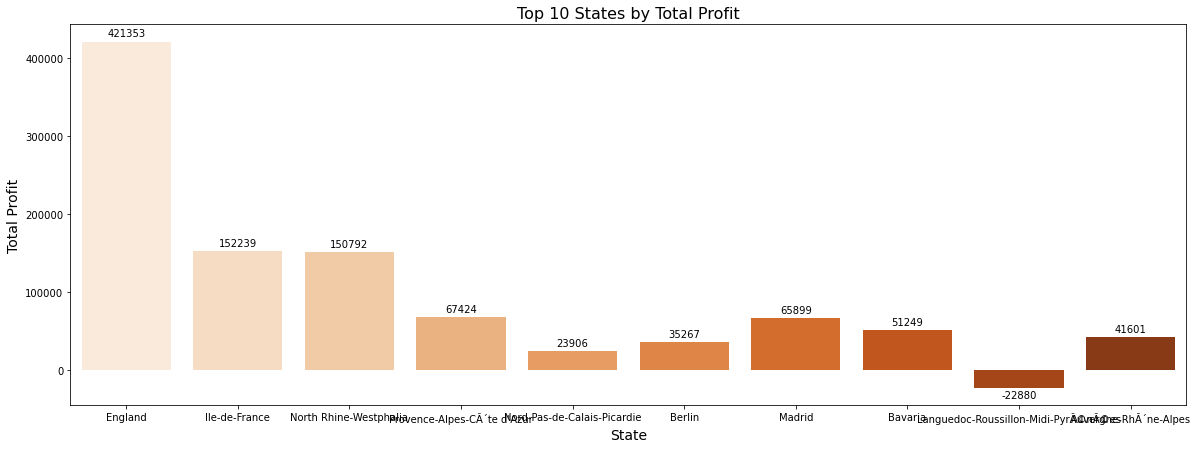

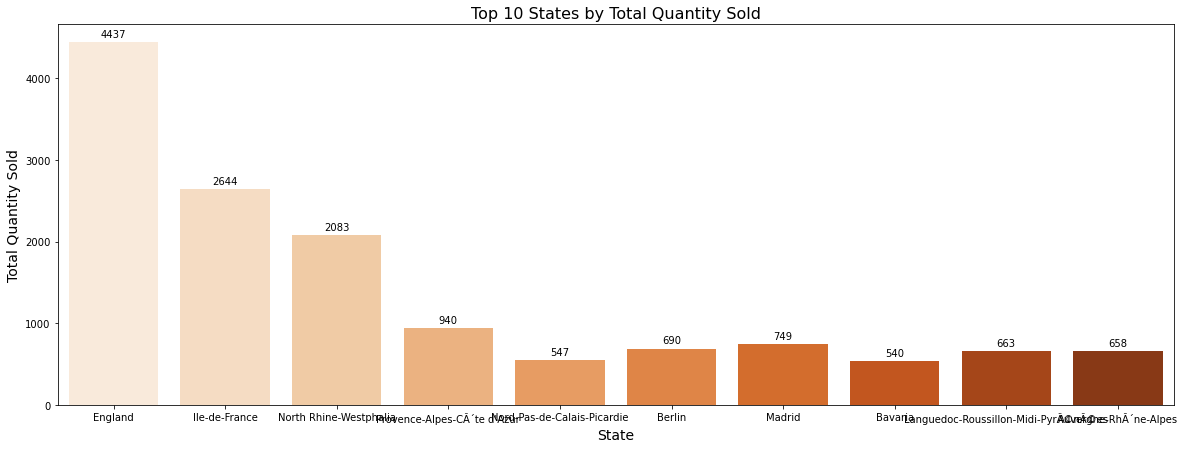

In [150]:
#sales plot by state
plt.figure(figsize=(20,7))
sns.barplot(data=state_analysis.head(10), x='State', y='Total_Sales', palette='Oranges')
plt.bar_label(plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Top 10 States by Total Sales', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.show()

#profit plot by state
plt.figure(figsize=(20,7))  
sns.barplot(data=state_analysis.head(10), x='State', y='Total_Profit', palette='Oranges')
plt.bar_label(bar_values := plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Top 10 States by Total Profit', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.show()

#quantity plot by state
plt.figure(figsize=(20,7))
sns.barplot(data=state_analysis.head(10), x='State', y='Quantity', palette='Oranges')
plt.bar_label(plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Top 10 States by Total Quantity Sold', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.show()




- Top Performers: England leads in both sales and profit, followed by Ile-de-France and North Rhine-Westphalia.
- Regional Variances: Madrid and Vienna show notable sales and profit figures, indicating strong performance in these regions compared to others.
- Challenges in Certain Regions: Bavaria and Berlin, despite moderate sales, have comparatively lower profit margins, suggesting potential operational or cost-efficiency issues in these areas.


Which country has the highest sales, and which has the highest profit?

In [142]:
#group data by month and calculate sum
country_analysis = df.groupby('Country').agg({
    'Total_Sales': 'sum',
    'Total_Profit': 'sum',
    'Quantity': 'sum',
}).reset_index().sort_values(by='Total_Sales', ascending=False)

In [143]:
country_analysis.style.background_gradient(cmap='Oranges')

,Country,Total_Sales,Total_Profit,Quantity
4,France,3108592,337279,7329
5,Germany,2411483,410949,6179
14,United Kingdom,2161947,478282,4917
11,Spain,1340580,255331,2878
7,Italy,1177921,72652,3612
0,Austria,391694,105081,973
8,Netherlands,379714,-203908,1526
1,Belgium,229718,56715,529
12,Sweden,168461,-103370,753
13,Switzerland,141661,44784,308


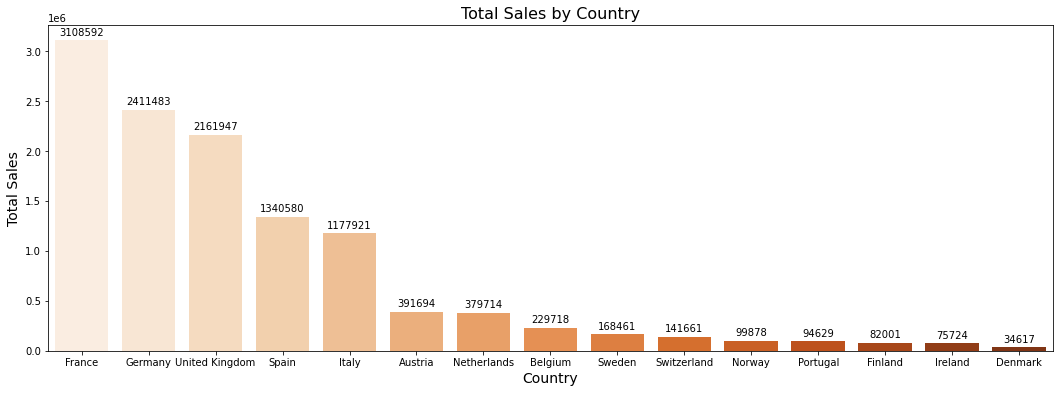

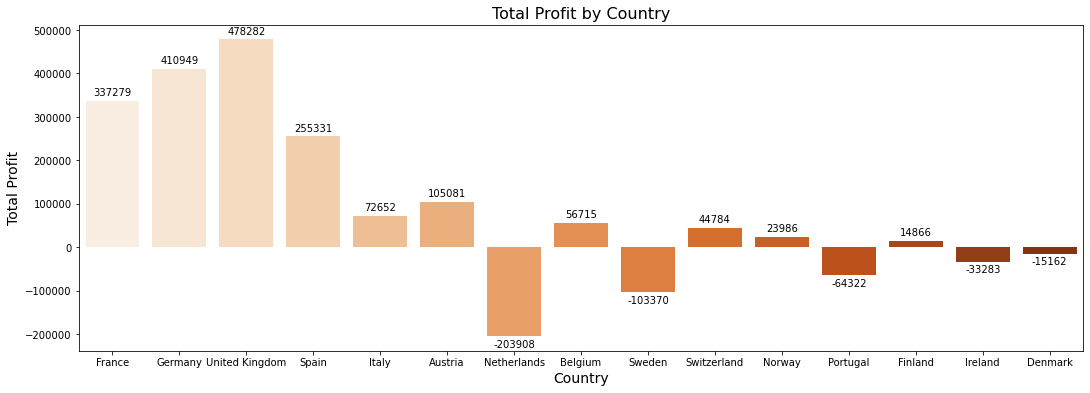

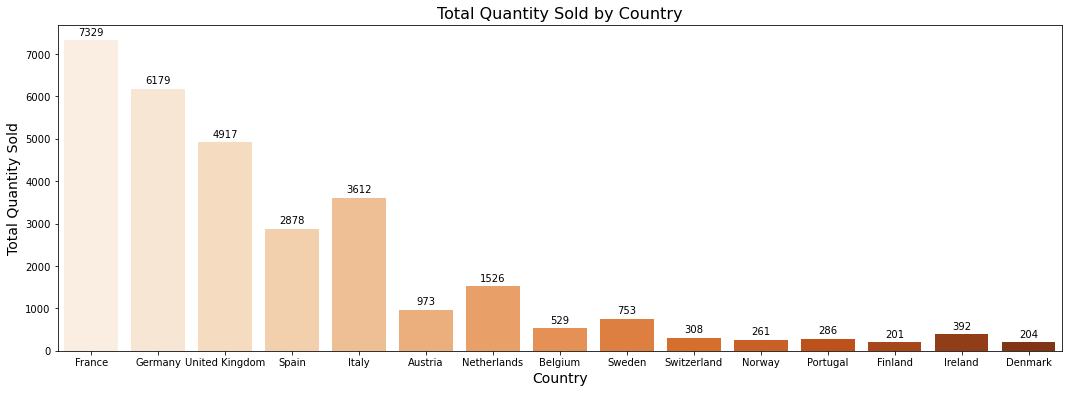

In [147]:
#sales plot by country
plt.figure(figsize=(18,6))
sns.barplot(data=country_analysis, x='Country', y='Total_Sales', palette='Oranges')
plt.bar_label(plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Total Sales by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.show()

#profit plot by country
plt.figure(figsize=(18,6))
sns.barplot(data=country_analysis, x='Country', y='Total_Profit', palette='Oranges')
plt.bar_label(bar_values := plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Total Profit by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.show()

#quantity plot by country
plt.figure(figsize=(18,6))
sns.barplot(data=country_analysis, x='Country', y='Quantity', palette='Oranges')
plt.bar_label(plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Total Quantity Sold by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.show()

- Top Performers: France, Germany, and the United Kingdom stand out as the top performers in both sales and profit.
- Profitable Markets: These countries, along with Italy and Spain, demonstrate significant profits despite varying sales volumes.
- Challenges: Some countries, such as Sweden, Ireland, Portugal, and Denmark, face challenges with sales and profitability, with losses incurred in their operations.
- Mixed Results: Countries like Austria, Switzerland, and Finland show moderate sales figures with varying levels of profitability.
- Netherlands' Losses: Notably, the Netherlands experienced a loss despite achieving considerable sales, indicating potential issues with cost management or pricing strategies.

Which Region has the highest sales, and which has the highest profit?

In [ ]:
#group data by month and calculate sum
region_anaglysis = df.groupby('Region').agg({
    'Total_Sales': 'sum',
    'Total_Profit': 'sum',
    'Quantity': 'sum',
}).reset_index().sort_values(by='Total_Sales', ascending=False)

In [152]:
region_analysis.style.background_gradient(cmap='Oranges')

,Region,Total_Sales,Total_Profit,Quantity
0,Central,6662862,750900,16844
1,North,2622628,365319,6728
2,South,2613130,263661,6776


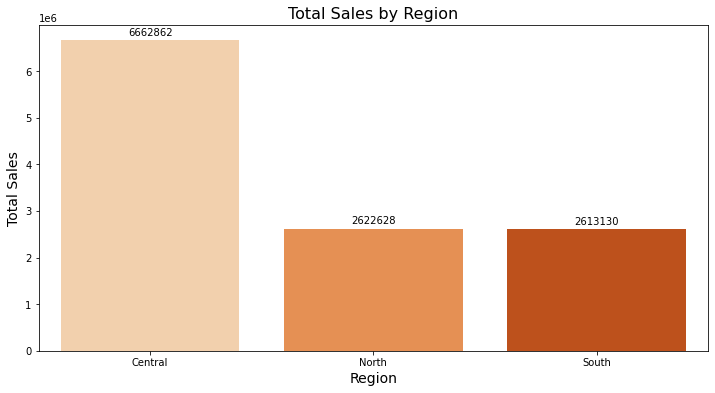

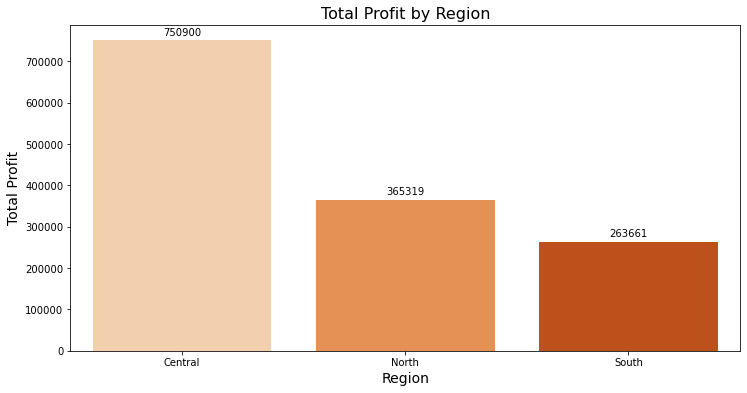

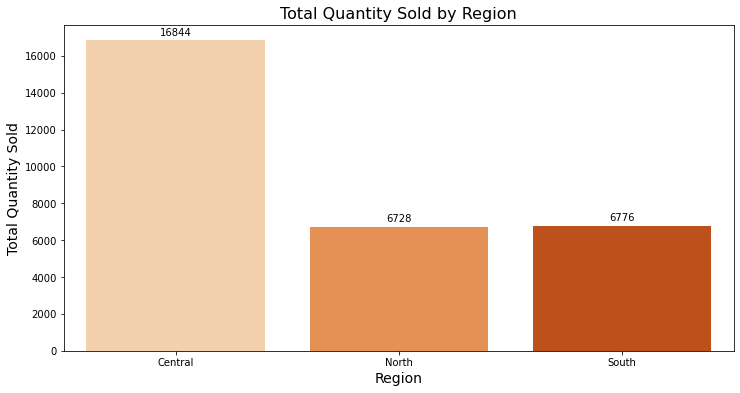

In [153]:
#sales plot by region
plt.figure(figsize=(12,6)) 
sns.barplot(data=region_analysis, x='Region', y='Total_Sales', palette='Oranges')
plt.bar_label(plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Total Sales by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.show()

#profit plot by region
plt.figure(figsize=(12,6))
sns.barplot(data=region_analysis, x='Region', y='Total_Profit', palette='Oranges')
plt.bar_label(bar_values := plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Total Profit by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.show()

#quantity plot by region

plt.figure(figsize=(12,6))
sns.barplot(data=region_analysis, x='Region', y='Quantity', palette='Oranges')
plt.bar_label(plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Total Quantity Sold by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.show()

- Central Region Dominance: The Central region leads significantly in both sales and profit, indicating a strong market presence and effective operations.
- Balanced Performance in North and South: While the North and South regions have relatively lower sales compared to the Central region, they still maintain decent profit margins, suggesting balanced performance across different geographical areas.

Which product categories contribute the most to sales and profit?

In [154]:
#group data by month and calculate sum
category_analysis = df.groupby('Category').agg({
    'Total_Sales': 'sum',
    'Total_Profit': 'sum',
    'Quantity': 'sum',
}).reset_index().sort_values(by='Total_Sales', ascending=False)

In [155]:
category_analysis.style.background_gradient(cmap='Oranges')

,Category,Total_Sales,Total_Profit,Quantity
2,Technology,4556714,543517,5811
1,Office Supplies,4211008,630841,19896
0,Furniture,3130898,205522,4641


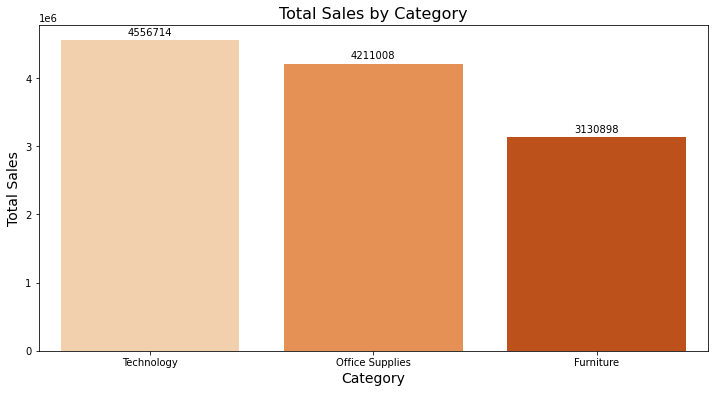

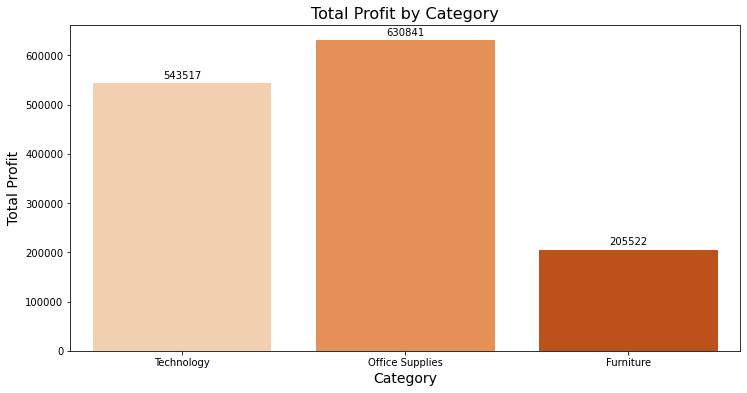

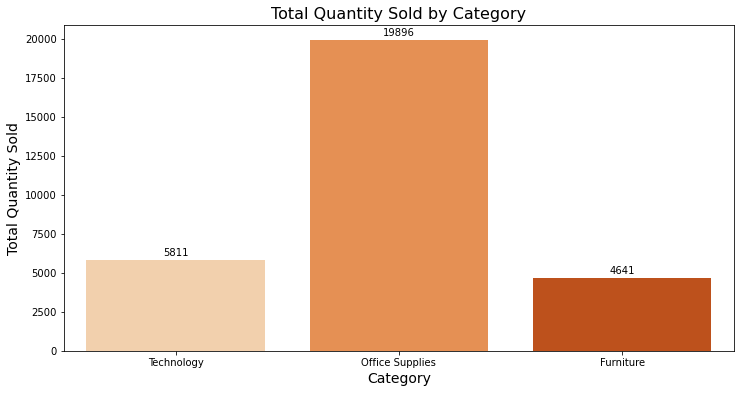

In [156]:
#sales plot by category
plt.figure(figsize=(12,6))
sns.barplot(data=category_analysis, x='Category', y='Total_Sales', palette='Oranges')
plt.bar_label(plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Total Sales by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.show()

#profit plot by category
plt.figure(figsize=(12,6))
sns.barplot(data=category_analysis, x='Category', y='Total_Profit', palette='Oranges')
plt.bar_label(bar_values := plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Total Profit by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.show()

#quantity plot by category
plt.figure(figsize=(12,6))
sns.barplot(data=category_analysis, x='Category', y='Quantity', palette='Oranges')
plt.bar_label(plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Total Quantity Sold by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.show()

- Technology Segment Dominance: Technology emerges as the leading category in terms of sales, closely followed by office supplies.
- Profit Margin: Although office supplies have slightly lower sales compared to technology, they exhibit a higher profit margin, indicating their importance in generating profitability.
- Furniture Segment: While furniture has decent sales figures, its profit margin is comparatively lower, suggesting potential challenges or lower profit margins in this category.

In [157]:
#group data by month and calculate sum
sub_category_analysis = df.groupby('Sub-Category').agg({
    'Total_Sales': 'sum',
    'Total_Profit': 'sum',
    'Quantity': 'sum',
}).reset_index().sort_values(by='Total_Sales', ascending=False)

In [158]:
sub_category_analysis.style.background_gradient(cmap='Oranges')

,Sub-Category,Total_Sales,Total_Profit,Quantity
6,Copiers,1481165,215433,1367
13,Phones,1462536,141249,1743
4,Bookcases,1395468,172850,1426
14,Storage,1384007,110684,3887
1,Appliances,1076517,192283,888
5,Chairs,963982,69501,1459
11,Machines,914229,58766,1249
0,Accessories,698784,128069,1452
2,Art,644244,116826,4326
16,Tables,421030,-92356,287


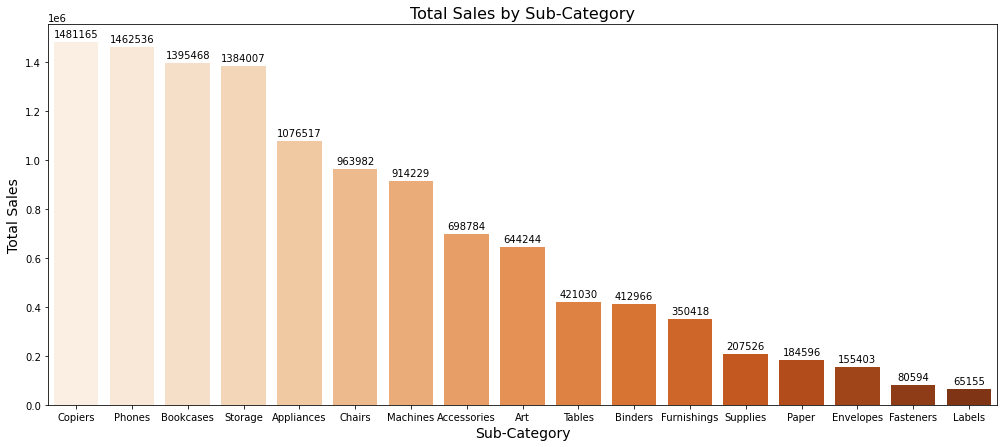

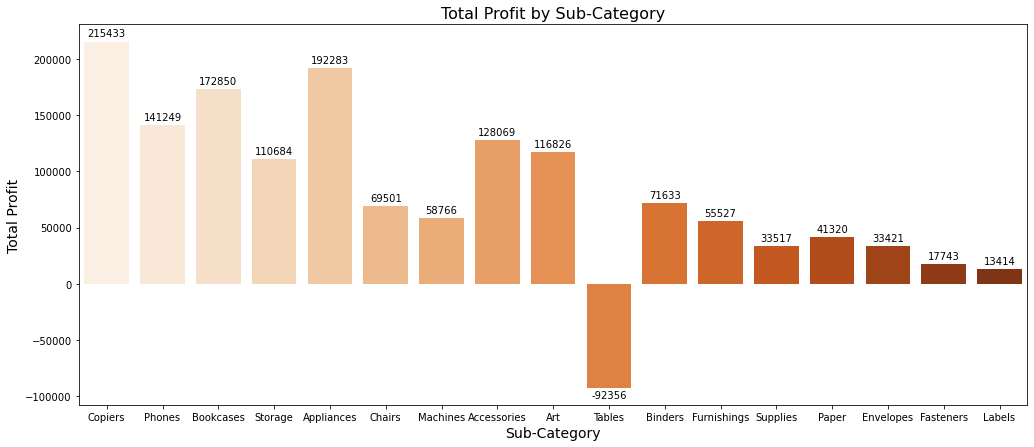

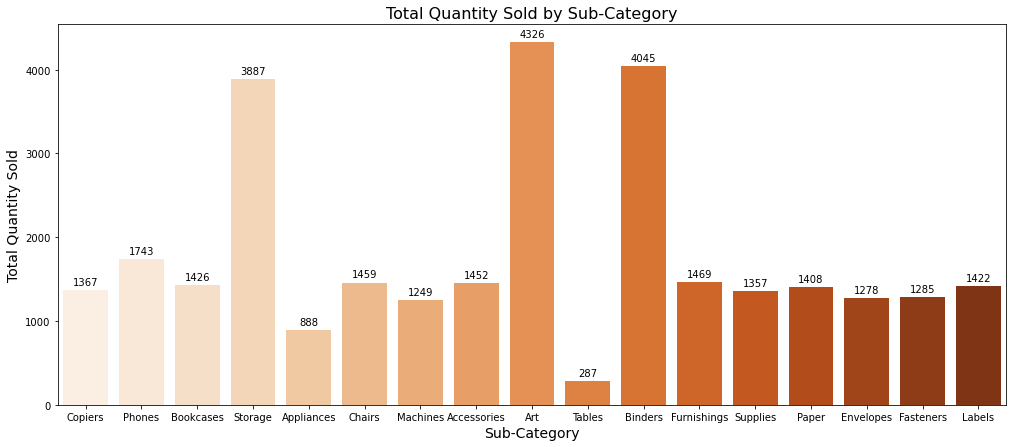

In [161]:
#sales plot by sub-category
plt.figure(figsize=(17,7))
sns.barplot(data=sub_category_analysis, x='Sub-Category', y='Total_Sales', palette='Oranges')
plt.bar_label(plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Total Sales by Sub-Category', fontsize=16)
plt.xlabel('Sub-Category', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.show()

#profit plot by sub-category
plt.figure(figsize=(17,7))
sns.barplot(data=sub_category_analysis, x='Sub-Category', y='Total_Profit', palette='Oranges')
plt.bar_label(bar_values := plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Total Profit by Sub-Category', fontsize=16)
plt.xlabel('Sub-Category', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.show()

#quantity plot by sub-category
plt.figure(figsize=(17,7))
sns.barplot(data=sub_category_analysis, x='Sub-Category', y='Quantity', palette='Oranges')
plt.bar_label(plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Total Quantity Sold by Sub-Category', fontsize=16)
plt.xlabel('Sub-Category', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.show()


- Top Performing Sub-Categories: Bookcases and copiers emerge as the top-performing sub-categories, boasting high sales figures and significant profits.
- Profitable Sub-Categories: Despite lower sales volumes, accessories, art, and appliances demonstrate notable profit margins, indicating their importance in generating profitability.
- Challenges in Tables Sub-Category: The tables sub-category shows a negative profit, suggesting potential issues such as high costs or pricing strategies that need attention.

How does the presence of discounts affect sales and profit?

In [162]:
#group data by month and calculate sum
discount_analysis = df.groupby('Discount(%)').agg({
    'Total_Sales': 'sum',
    'Total_Profit': 'sum',
    'Quantity': 'sum',
}).reset_index().sort_values(by='Total_Sales', ascending=False)


In [163]:
discount_analysis.style.background_gradient(cmap='Oranges')

,Discount(%),Total_Sales,Total_Profit,Quantity
0,0,6228857,1593026,18550
1,10,2944901,475866,4915
2,15,935232,83031,1074
8,50,899850,-496620,3750
6,40,316799,-95888,898
5,35,230146,-42676,146
3,20,154501,7354,401
9,60,97873,-70502,364
10,65,32333,-28356,56
4,30,24015,-3547,140


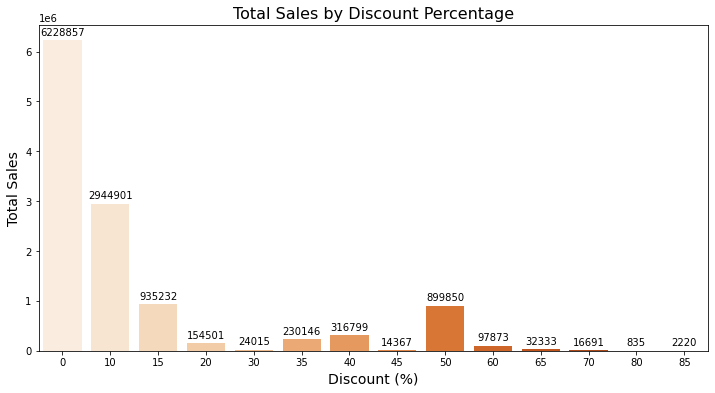

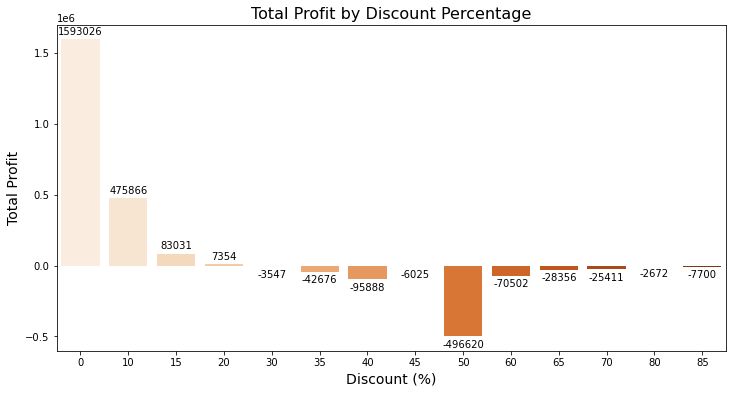

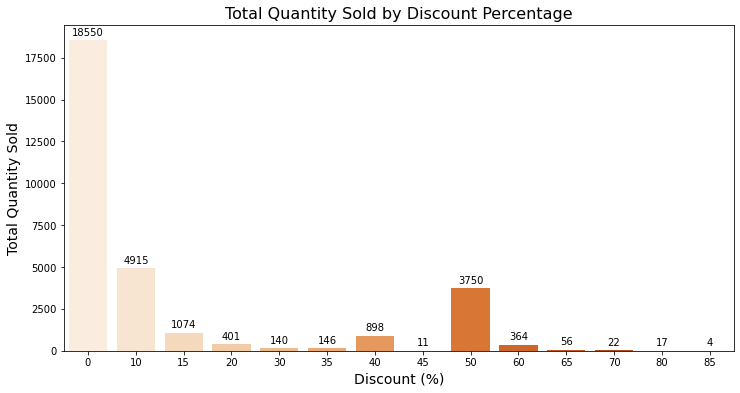

In [164]:
#sales plot by discount
plt.figure(figsize=(12,6))
sns.barplot(data=discount_analysis, x='Discount(%)', y='Total_Sales', palette='Oranges')
plt.bar_label(plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Total Sales by Discount Percentage', fontsize=16)
plt.xlabel('Discount (%)', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.show()

#profit plot by discount
plt.figure(figsize=(12,6))
sns.barplot(data=discount_analysis, x='Discount(%)', y='Total_Profit', palette='Oranges')
plt.bar_label(bar_values := plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Total Profit by Discount Percentage', fontsize=16)
plt.xlabel('Discount (%)', fontsize=14)
plt.ylabel('Total Profit', fontsize=14)
plt.show()

#quantity plot by discount
plt.figure(figsize=(12,6))
sns.barplot(data=discount_analysis, x='Discount(%)', y='Quantity', palette='Oranges')
plt.bar_label(plt.gca().containers[0], fmt='%.0f', padding=3)
plt.title('Total Quantity Sold by Discount Percentage', fontsize=16)
plt.xlabel('Discount (%)', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.show()


- Impact of Discounts on Profit: There is a noticeable decrease in profit as the discount rate increases beyond 0.15. Discounts of 0.35 and above result in negative profits, indicating potential loss-making transactions.
- Sales Variability: Sales figures fluctuate across different discount rates, with some rates contributing to significantly higher sales, such as 0.35 and 0.45.
- Profitability Threshold: It's essential to analyze the profitability threshold for discounts to ensure that they contribute positively to overall profitability rather than causing losses.

#### **What are the top 5 best-selling products in terms of quantity?**

In [165]:
df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10).to_frame().reset_index()

,Product Name,Quantity
0,"Rogers File Cart, Single Width",108
1,"Eldon File Cart, Single Width",104
2,"Binney & Smith Sketch Pad, Blue",90
3,"Stanley Pencil Sharpener, Water Color",89
4,"Avery Index Tab, Clear",81
5,"Boston Pencil Sharpener, Water Color",80
6,"Tenex File Cart, Single Width",78
7,"Sanford Markers, Water Color",75
8,"Boston Canvas, Fluorescent",73
9,"Ibico Index Tab, Clear",72


In [167]:
df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).tail(10).to_frame().reset_index()

,Product Name,Quantity
0,"Harbour Creations Bag Chairs, Set of Two",1
1,"Avery Shipping Labels, Alphabetical",1
2,"Jiffy Manila Envelope, Recycled",1
3,"Cuisinart Microwave, Black",1
4,"Sauder Stackable Bookrack, Mobile",1
5,"Office Star Chairmat, Set of Two",1
6,"Cuisinart Refrigerator, White",1
7,"Breville Blender, Black",1
8,"Acme Box Cutter, Steel",1
9,"Cameo Mailers, Set of 50",1


- Top Selling Products: The top-selling products based on quantity sold are the "Rogers File Cart, Single Width" and the "Eldon File Cart, Single Width," indicating high demand for file carts.
- Popular Stationery: Stationery items such as the "Binney & Smith Sketch Pad, Blue" and the "Stanley Pencil Sharpener, Water Color" also show considerable sales quantities, suggesting a demand for office supplies.
- Index Tab Sales: The "Avery Index Tab, Clear" also has notable sales, indicating a need for organizational accessories.

#### **Which products or categories receive the most feedback?**

In [168]:
feedback_counts = df.groupby(['Product Name', 'Category']).agg({'Feedback': 'count'}).reset_index()

feedback_counts_sorted = feedback_counts.sort_values(by='Feedback', ascending=False)

print("Products or categories with the most feedback:")
print(feedback_counts_sorted.head(10))

Products or categories with the most feedback:
                               Product Name         Category  Feedback
582           Eldon File Cart, Single Width  Office Supplies        26
1367         Rogers File Cart, Single Width  Office Supplies        23
1645  Stanley Pencil Sharpener, Water Color  Office Supplies        22
1532  Sanford Pencil Sharpener, Water Color  Office Supplies        22
1732          Tenex File Cart, Single Width  Office Supplies        21
183                  Avery Index Tab, Clear  Office Supplies        21
311    Boston Pencil Sharpener, Water Color  Office Supplies        20
293         Binney & Smith Sketch Pad, Blue  Office Supplies        19
1379            Rogers Shelving, Wire Frame  Office Supplies        18
993                  Ibico Index Tab, Clear  Office Supplies        18


- Most Feedback: The "Eldon File Cart, Single Width" received the highest feedback of 14, making it the product with the most feedback.
- Diverse Categories: The products with the most feedback mainly belong to the "Office Supplies" category, indicating a significant amount of customer engagement and interest in this category.
- Technology Product: The "Nokia Smart Phone, Full Size" stands out as the only product from the "Technology" category among those with the most feedback, suggesting a strong customer response to technological products as well.

In [169]:
df.groupby(['Feedback', 'Product Name'])['Quantity'].count().sort_values(ascending=False).head(10)

Feedback  Product Name                          
True      Eldon File Cart, Single Width             14
False     Rogers File Cart, Single Width            14
          Avery Index Tab, Clear                    14
True      Sanford Pencil Sharpener, Water Color     13
          Nokia Smart Phone, Full Size              13
False     Stanley Pencil Sharpener, Water Color     12
          Eldon File Cart, Single Width             12
True      Tenex File Cart, Single Width             12
          Fellowes Box, Industrial                  11
False     Binney & Smith Sketch Pad, Water Color    11
Name: Quantity, dtype: int64

In [170]:
true_feedback = df[df['Feedback'] == 'True']
true_feedback.groupby('Product Name')['Feedback'].count().sort_values(ascending=False).head()

Product Name
Eldon File Cart, Single Width            14
Nokia Smart Phone, Full Size             13
Sanford Pencil Sharpener, Water Color    13
Tenex File Cart, Single Width            12
Ibico Index Tab, Clear                   11
Name: Feedback, dtype: int64

In [171]:
true_feedback = df[df['Feedback'] == 'False']
true_feedback.groupby('Product Name')['Feedback'].count().sort_values(ascending=False).head()

Product Name
Avery Index Tab, Clear                   14
Rogers File Cart, Single Width           14
Eldon File Cart, Single Width            12
Stanley Pencil Sharpener, Water Color    12
Boston Pencil Sharpener, Water Color     11
Name: Feedback, dtype: int64

- Feedback Influence: There's a slight difference in both sales and profit between transactions with and without feedback. Sales and profit are higher when feedback is present, indicating a potential correlation between customer feedback and increased sales and profitability.
- Marginally Higher Values: Sales and profit values are marginally higher for transactions with feedback compared to those without, suggesting that customer feedback might contribute positively to business performance.

### **Conclusions:**
The provided data reveals a positive sales trend over the years, with 2014 exhibiting the highest sales figures. Profitability analysis indicates varying margins across categories and ship modes, with technology and office supplies demonstrating higher profitability. Discounts influence sales and profits, but higher rates often lead to lower profits. Most transactions involve quantities of 2 or 3, while larger orders are less frequent. Customer feedback plays a crucial role, highlighting strong engagement and areas for improvement in products and services.